This notebook plots signal-to-noise ratio of the new civilian signal L1C broadcasted by the GPS-III satellellite SVN-74 (G04)

Copyright: Octavian Andrei, 2019

In [1]:
# additional libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline

In [2]:
# constants
SIDEREAL_DAY = 86164

In [3]:
# read one G04 file into a dataframe
def read_G04_obs(filename: str):
    """
    This function reads a file that contains tabular observation data for satellite G04
    """
    df = pd.read_csv(filename, delim_whitespace=True, parse_dates={'EPOCH': ['DATE', 'TIME']}, na_values=9999999999.999)
    df = df.drop(labels=['#HD', 'G', 'PRN'], axis=1).set_index('EPOCH')
    return df

In [4]:
# test for one file
fname = 'C:/cygwin64/home/oan/grc/2019/mtrb/2019/096/G04_2019096.txt'
df = read_G04_obs(fname)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29074 entries, 2019-04-06 01:41:51 to 2019-04-06 17:42:46
Data columns (total 24 columns):
C1C    28934 non-null float64
C1W    28162 non-null float64
C1X    29074 non-null float64
C2W    28162 non-null float64
C2X    28927 non-null float64
C5X    28925 non-null float64
D1C    28934 non-null float64
D1W    28162 non-null float64
D1X    29074 non-null float64
D2W    28162 non-null float64
D2X    28927 non-null float64
D5X    28925 non-null float64
L1C    28934 non-null float64
L1W    28162 non-null float64
L1X    29074 non-null float64
L2W    28162 non-null float64
L2X    28927 non-null float64
L5X    28925 non-null float64
S1C    28934 non-null float64
S1W    28161 non-null float64
S1X    29074 non-null float64
S2W    28161 non-null float64
S2X    28927 non-null float64
S5X    28925 non-null float64
dtypes: float64(24)
memory usage: 5.5 MB


In [5]:
# data for multiple files
file_list = glob.glob('C:/cygwin64/home/oan/grc/2019/mtrb/2019/*/G04*.txt')

df = pd.concat([read_G04_obs(file) for file in file_list])

df.shape

(985739, 24)

In [6]:
# number of records per day
df.index.dayofyear.value_counts().sort_index()

95      6312
96     29074
97     29029
98     28269
99     28630
100    25674
101    28971
102    29271
103    28636
104    28933
105    29060
106    28643
107    29093
108    28718
109    28683
110    28942
111    28965
112    28207
113    28971
114    29105
115    28825
116    29126
117    28973
118    29076
119    28860
120    28779
121    28913
122    28857
123    29000
124    29316
125    28263
126    28921
127    29290
128    28930
129    29424
Name: EPOCH, dtype: int64

In [7]:
# SNR statistics for all frequencies
cols = ['S1C', 'S1W', 'S1X', 'S2W', 'S2X', 'S5X']
df[cols].describe()

,S1C,S1W,S1X,S2W,S2X,S5X
count,948073.000000,925053.000000,984862.000000,925033.00000,946804.000000,946658.000000
mean,43.843262,34.562301,45.820907,34.56273,47.797196,52.595068
std,6.208488,10.105098,6.218735,10.10478,6.233824,6.414276
min,1.750000,0.250000,20.000000,0.25000,9.250000,12.750000
25%,38.500000,23.750000,40.000000,23.75000,42.000000,46.750000
50%,44.250000,36.750000,47.000000,36.75000,48.000000,52.750000
75%,49.750000,44.000000,51.750000,44.00000,53.250000,58.500000
max,54.000000,48.000000,54.500000,48.00000,58.000000,62.750000


In [8]:
df.loc['2019-04-06 02:00:00':'2019-04-06 02:59:59'].iloc[0].C1X

24443060.138

In [9]:
#df.resample('12H').apply(lambda x: x.mean())

In [10]:
# plots for each solar day
fout = 'g04_s1c_s1x.pdf'

def plot_solar_days(data: pd.DataFrame):
    
    with PdfPages(fout) as pdf:
        
        # columns to be plotted
        cols = ['S1C', 'S1X', 'S2X', 'S5X'];
        
        # loop over the days
        for n in range(96,130):

            # daytime format
            d = pd.to_datetime('2019{:03d}'.format(n), format='%Y%j')
            mask = d.strftime('%Y-%m-%d')

            # plot
            fig, ax = plt.subplots(figsize=(14,10))
            data[mask][cols].plot(ax=ax)

            # settings
            ax.set_ylabel('SNR [dbHz]')
            ax.set_xlabel('Time')
            ts = pd.Timestamp(mask); te = ts + pd.Timedelta('1D'); ax.set(xlim=(ts,te))
            ax.set(ylim=(0,65))
            title = '{} (2019-{:03d})'.format(mask, n); ax.set_title(title)
            ax.yaxis.grid(linestyle=':')

            # save the current plot
            pdf.savefig(fig, dpi=200, bbox_inches='tight')
            plt.clf()
            
plot_solar_days(df)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

# SOLAR DAY repeat

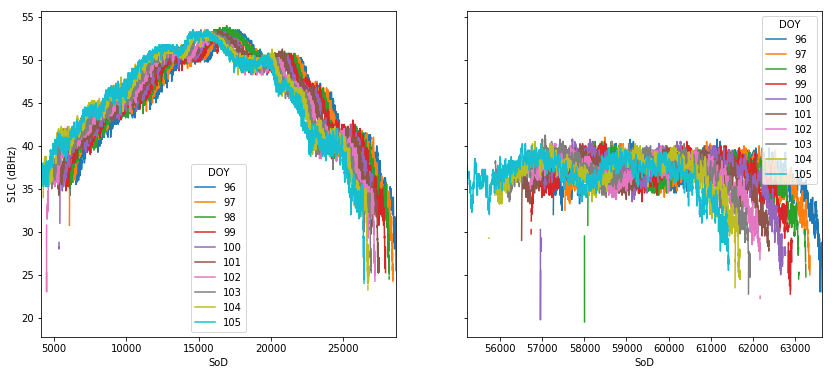

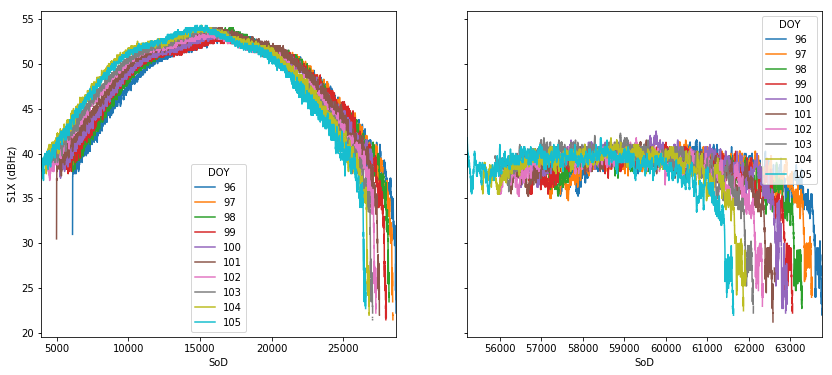

In [11]:
def plot_solar_day(data, obstype='S1C'):
    fig, axarr = plt.subplots(1,2,figsize=(14,6), sharey=True);

    A = data.asfreq('1S')
    A['DOY'] = A.index.dayofyear
    index = A.index.second+A.index.minute*60+A.index.hour*3600
    index.name = 'SoD'
    
    A = A.pivot_table(index=index, columns='DOY', values=obstype)
    
    # 1-st pass
    ax = axarr[0]; x = A.loc[3600*1:3600*8]; x.plot(ax=ax);
    ax.set_ylabel('{} (dBHz)'.format(obstype))
    
    #txt = 'Mean: ' + ', '.join('{:.2f}'.format(e) for e in x.mean().to_list())
    #ax.set_title(txt, loc='left')
    
    
    # 2-nd pass
    ax = axarr[1]; x = A.loc[3600*15:]; x.plot(ax=ax);
    #txt = 'Mean: ' + ', '.join('{:.2f}'.format(e) for e in x.mean().to_list())
    #ax.set_title(txt, loc='left')
    
    return fig

# 10 solar days
A = df['2019-04-06':'2019-04-15']
plot_solar_day(A, 'S1C');
plot_solar_day(A, 'S1X');

In [12]:
# fill in to make continuous data
ts = df.index[0].date()
ndays = (df.index[-1] - df.index[0]).days + 1
B = pd.DataFrame(index=pd.date_range(ts, periods=86400*ndays, freq='S'), data=np.zeros(86400*ndays), columns=['EMPTY'])
B = pd.merge(B,df,how='left',left_index=True, right_index=True).drop('EMPTY',axis=1)
B.shape

(3024000, 24)

In [13]:
# check
# B.index.dayofyear.value_counts().sort_index()

# SIDEREAL DAY repeat

In [14]:
# day 095 is incomplete
B = B['2019-04-06':]

In [15]:
B['SoD'] = B.index.map(lambda x: x.hour*3600+x.minute*60+x.second)
B['SECONDS'] = B.reset_index().index
B['SIDEREALDAY'] = B['SECONDS']//SIDEREAL_DAY
B['SIDEREALSEC'] = B['SECONDS']%SIDEREAL_DAY

B.tail(2)

,C1C,C1W,C1X,C2W,C2X,C5X,D1C,D1W,D1X,D2W,...,S1C,S1W,S1X,S2W,S2X,S5X,SoD,SECONDS,SIDEREALDAY,SIDEREALSEC
2019-05-09 23:59:58,2.367772e+07,2.367772e+07,2.367772e+07,2.367772e+07,2.367772e+07,2.367772e+07,4069.955,4069.955,4069.965,3171.352,...,42.25,30.0,44.0,30.0,45.00,49.25,86398,2937598,34,8022
2019-05-09 23:59:59,2.367695e+07,2.367695e+07,2.367695e+07,2.367694e+07,2.367695e+07,2.367695e+07,4069.754,4069.754,4069.759,3171.272,...,42.00,29.5,44.0,29.5,44.75,49.25,86399,2937599,34,8023


In [16]:
# remove the last incomplete sidereal day for convenience
mask = B['SIDEREALDAY'] < 34
B = B[mask]

In [17]:
# stats over the entire sidereal period
B[cols].describe()

,S1C,S1W,S1X,S2W,S2X,S5X
count,940061.000000,917446.000000,976152.000000,917426.000000,938810.000000,938665.000000
mean,43.897982,34.663437,45.884452,34.663872,47.853366,52.652681
std,6.203025,10.082455,6.204412,10.082129,6.228503,6.408793
min,1.750000,0.250000,20.000000,0.250000,9.250000,12.750000
25%,38.500000,23.750000,40.000000,23.750000,42.000000,46.750000
50%,44.500000,37.000000,47.250000,37.000000,48.000000,53.000000
75%,49.750000,44.000000,51.750000,44.000000,53.250000,58.500000
max,54.000000,48.000000,54.500000,48.000000,58.000000,62.750000


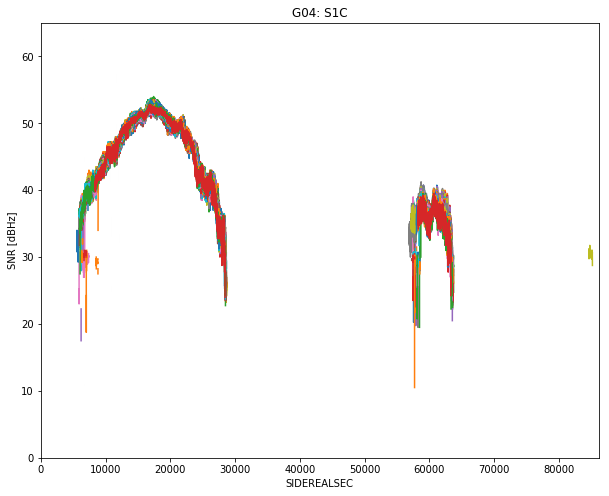

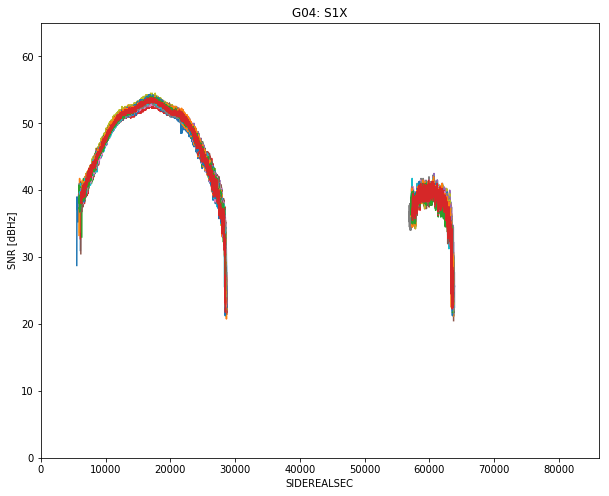

In [18]:
def plot_sidereal_day(data, obstype):
    
    fig, ax = plt.subplots(figsize=(10,8))
    
    A = data.pivot_table(values=obstype, index='SIDEREALSEC', columns='SIDEREALDAY')

    A.plot(ax=ax, legend=False)
    #A.plot(ax=ax, legend=False, color='blue', marker='+', linestyle='None')
    
    title = 'G04: {}'.format(obstype)
    ax.set(xlim=(0,SIDEREAL_DAY+1), ylim=(0,65), ylabel='SNR [dBHz]', title=title);
    
    return ax
    

plot_sidereal_day(B, 'S1C')
plot_sidereal_day(B, 'S1X')

In [19]:
# stats per sidereal days
B.pivot_table(values='S1X', index='SIDEREALSEC', columns='SIDEREALDAY').describe().T

,count,mean,std,min,25%,50%,75%,max
SIDEREALDAY,,,,,,,,
0,29074.0,45.464831,5.995239,22.00,39.75,46.500,51.25,53.50
1,29027.0,45.767139,6.065898,21.50,39.75,47.250,51.50,53.50
2,28266.0,45.754679,6.203639,22.25,39.75,47.000,51.50,54.00
3,28627.0,45.656766,5.964457,21.50,39.75,47.000,51.25,53.00
4,25658.0,45.435741,5.651055,22.25,40.25,45.500,51.00,53.50
5,28970.0,46.001200,6.233889,21.25,40.00,47.250,51.75,54.00
6,29268.0,45.755740,6.056396,22.25,39.75,47.000,51.50,53.50
7,28636.0,46.098294,6.048084,21.50,40.50,47.250,51.75,54.00
8,28930.0,46.238757,6.285321,22.00,40.25,47.750,52.25,54.25


In [20]:
# how much the mean value deviates from day to day
[(col, B.pivot_table(values=col, index='SIDEREALSEC', columns='SIDEREALDAY').mean().std()) for col in cols]

[('S1C', 0.23995385355324086),
 ('S1W', 0.46220172721541686),
 ('S1X', 0.18974544352460224),
 ('S2W', 0.4621613272773601),
 ('S2X', 0.23972544366796666),
 ('S5X', 0.2621631478384296)]

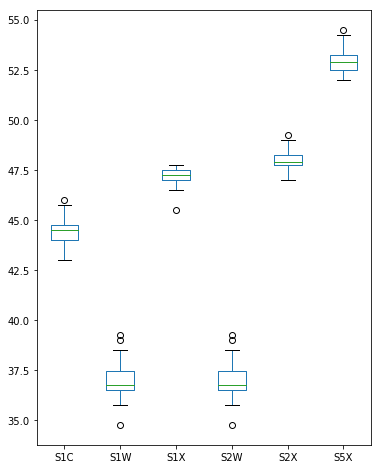

In [21]:
# boxplot of the sidereal daily medians
B.groupby('SIDEREALDAY')[cols].median().plot(kind='box', figsize=(6,8))

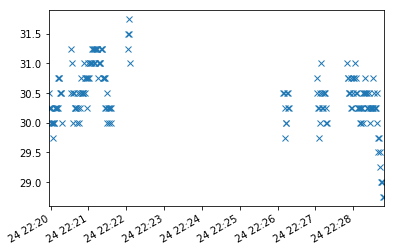

In [22]:
# S1C recordings outside the arc on 2019-04-24 (???)
B[B['SIDEREALSEC']>70000]['S1C'].dropna().plot(linestyle='None', marker='x')

In [23]:
B['2019-04-24 22:19:56':'2019-04-24 22:30']

,C1C,C1W,C1X,C2W,C2X,C5X,D1C,D1W,D1X,D2W,...,S1C,S1W,S1X,S2W,S2X,S5X,SoD,SECONDS,SIDEREALDAY,SIDEREALSEC
2019-04-24 22:19:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,80396,1635596,18,84644
2019-04-24 22:19:57,2.029774e+07,NaN,NaN,NaN,NaN,NaN,157.979,NaN,NaN,NaN,...,30.50,NaN,NaN,NaN,NaN,NaN,80397,1635597,18,84645
2019-04-24 22:19:58,2.029771e+07,2.029771e+07,NaN,2.029771e+07,NaN,NaN,157.206,157.206,NaN,122.761,...,30.25,24.50,NaN,24.50,NaN,NaN,80398,1635598,18,84646
2019-04-24 22:19:59,2.029768e+07,2.029768e+07,NaN,2.029768e+07,NaN,NaN,156.757,156.757,NaN,122.129,...,30.25,25.50,NaN,25.50,NaN,NaN,80399,1635599,18,84647
2019-04-24 22:20:00,2.029765e+07,2.029765e+07,NaN,2.029765e+07,NaN,NaN,156.020,156.020,NaN,121.738,...,30.25,26.00,NaN,26.00,NaN,NaN,80400,1635600,18,84648
2019-04-24 22:20:01,2.029762e+07,2.029762e+07,NaN,2.029762e+07,NaN,NaN,155.698,155.698,NaN,121.201,...,30.00,27.00,NaN,27.00,NaN,NaN,80401,1635601,18,84649
2019-04-24 22:20:02,2.029759e+07,2.029759e+07,NaN,2.029759e+07,NaN,NaN,155.251,155.251,NaN,120.849,...,30.00,26.50,NaN,26.50,NaN,NaN,80402,1635602,18,84650
2019-04-24 22:20:03,2.029756e+07,2.029756e+07,NaN,2.029756e+07,NaN,NaN,154.003,154.003,NaN,119.894,...,30.00,26.00,NaN,26.00,NaN,NaN,80403,1635603,18,84651
2019-04-24 22:20:04,2.029753e+07,2.029753e+07,NaN,2.029753e+07,NaN,NaN,153.583,153.583,NaN,119.735,...,29.75,26.25,NaN,26.25,NaN,NaN,80404,1635604,18,84652
2019-04-24 22:20:05,2.029750e+07,2.029751e+07,NaN,2.029751e+07,NaN,NaN,152.797,152.797,NaN,118.988,...,30.00,27.25,NaN,27.25,NaN,NaN,80405,1635605,18,84653


In [24]:
# there are complete code and phase measrements on L1 and L2 (?)
B.loc['2019-04-24 22:20:00']

C1C            2.029765e+07
C1W            2.029765e+07
C1X                     NaN
C2W            2.029765e+07
C2X                     NaN
C5X                     NaN
D1C            1.560200e+02
D1W            1.560200e+02
D1X                     NaN
D2W            1.217380e+02
D2X                     NaN
D5X                     NaN
L1C            1.066649e+08
L1W            1.066649e+08
L1X                     NaN
L2W            8.311548e+07
L2X                     NaN
L5X                     NaN
S1C            3.025000e+01
S1W            2.600000e+01
S1X                     NaN
S2W            2.600000e+01
S2X                     NaN
S5X                     NaN
SoD            8.040000e+04
SECONDS        1.635600e+06
SIDEREALDAY    1.800000e+01
SIDEREALSEC    8.464800e+04
Name: 2019-04-24 22:20:00, dtype: float64